La prueba de Grubbs de puede aplicar a conjuntos de datos numéricos UNIVARIANTES y con distribución normal

https://www.youtube.com/watch?v=KGWbbAUcC0I&ab_channel=BhaveshBhatt

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [37]:
%matplotlib inline

In [38]:
y = np.random.random(100)
x = np.arange(len(y))
y

array([3.63192008e-01, 4.80489404e-01, 7.00897045e-01, 9.02106145e-01,
       5.08085704e-01, 8.73403254e-01, 9.39637352e-01, 2.93758836e-01,
       7.86204981e-01, 2.73917791e-01, 3.25004104e-01, 9.94104560e-01,
       1.89791999e-01, 5.52860446e-01, 2.67757959e-01, 4.98175552e-01,
       1.27133217e-01, 3.49562492e-01, 8.50657319e-01, 3.91534841e-01,
       5.54195002e-02, 4.36675144e-01, 7.81730686e-01, 9.39795904e-01,
       4.28982078e-01, 1.99095446e-05, 4.09412559e-01, 9.58022585e-01,
       6.43038492e-01, 8.05284072e-02, 5.64749219e-01, 3.71539633e-01,
       3.12489385e-01, 7.36983574e-01, 2.12782128e-01, 4.87602276e-01,
       2.14883424e-01, 1.72956422e-01, 8.11453777e-01, 4.12523800e-01,
       9.12565660e-01, 3.51723931e-01, 9.02271066e-01, 8.78700648e-01,
       5.11508478e-01, 5.26313477e-01, 2.40506639e-02, 8.92860482e-01,
       1.71045275e-01, 1.87384432e-01, 1.10493172e-01, 7.28899564e-01,
       6.15168545e-01, 3.03141024e-01, 9.16694356e-01, 5.01429254e-01,
      

In [39]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [40]:
print(max(y),min(y))

0.9941045603628523 1.990954463315653e-05


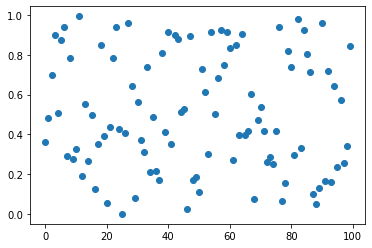

In [41]:
plt.scatter(x,y)

In [42]:
#Inputación de outliers
y[14] = 9
y[83] = 10
y

array([3.63192008e-01, 4.80489404e-01, 7.00897045e-01, 9.02106145e-01,
       5.08085704e-01, 8.73403254e-01, 9.39637352e-01, 2.93758836e-01,
       7.86204981e-01, 2.73917791e-01, 3.25004104e-01, 9.94104560e-01,
       1.89791999e-01, 5.52860446e-01, 9.00000000e+00, 4.98175552e-01,
       1.27133217e-01, 3.49562492e-01, 8.50657319e-01, 3.91534841e-01,
       5.54195002e-02, 4.36675144e-01, 7.81730686e-01, 9.39795904e-01,
       4.28982078e-01, 1.99095446e-05, 4.09412559e-01, 9.58022585e-01,
       6.43038492e-01, 8.05284072e-02, 5.64749219e-01, 3.71539633e-01,
       3.12489385e-01, 7.36983574e-01, 2.12782128e-01, 4.87602276e-01,
       2.14883424e-01, 1.72956422e-01, 8.11453777e-01, 4.12523800e-01,
       9.12565660e-01, 3.51723931e-01, 9.02271066e-01, 8.78700648e-01,
       5.11508478e-01, 5.26313477e-01, 2.40506639e-02, 8.92860482e-01,
       1.71045275e-01, 1.87384432e-01, 1.10493172e-01, 7.28899564e-01,
       6.15168545e-01, 3.03141024e-01, 9.16694356e-01, 5.01429254e-01,
      

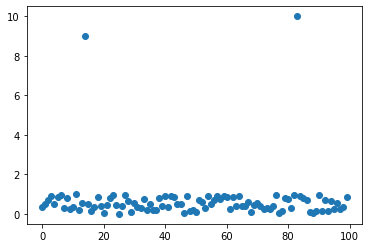

In [43]:
plt.scatter(x,y)

In [44]:
#Funcion para calcular las características G
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    print ("Grubbs Statistics value: {}".format(Gcal))
    return Gcal,max_ind

In [45]:
def calculate_critical_value(size,alpha):
    t_dist = stats.t.ppf(1 - alpha / (2* size),size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs critical value: {}".format(critical_value))
    return critical_value

In [46]:
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print("{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n".format(inp[max_index], Gs, Gc))
    else:
        print("{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n".format(inp[max_index],Gs,Gc))

In [47]:
#PARAMETROS: VECTOR NUMERICO CON LOS DATOS A ANALIZAR, ALPHA = NIVEL DE SIGNIFICANCIA DEL TEST, NUMERO MAXIMO DE OUTLIERS A DETECTAR
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range (max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [48]:
#se muestran 3 iteraciones en las cuales si el valor crítico de grubbs es mayor al estadistico de grubbs, es un outlier
ESD_Test(y,0.05,3)

Grubbs critical value: 3.384082902288351
Grubbs Statistics value: 7.198492516304293
10.0 is an outlier. G > G-critical: 7.1985 > 3.3841 

Grubbs critical value: 3.380650508067058
Grubbs Statistics value: 9.365142540735338
9.0 is an outlier. G > G-critical: 9.3651 > 3.3807 

Grubbs critical value: 3.377175980782947
Grubbs Statistics value: 1.7546183014516616
1.990954463315653e-05 is not an outlier. G > G-critical: 1.7546 > 3.3772 



In [34]:
ESD_Test(y,0.05,10)

Grubbs critical value: 3.384082902288351
Grubbs Statistics value: 7.170119979648035
10.0 is an outlier. G > G-critical: 7.1701 > 3.3841 

Grubbs critical value: 3.380650508067058
Grubbs Statistics value: 9.282795749893369
9.0 is an outlier. G > G-critical: 9.2828 > 3.3807 

Grubbs critical value: 3.377175980782947
Grubbs Statistics value: 1.7718614659288172
0.0019297565572488073 is not an outlier. G > G-critical: 1.7719 > 3.3772 

Grubbs critical value: 3.3736583400522497
Grubbs Statistics value: 1.7862848169431325
0.009459357761924969 is not an outlier. G > G-critical: 1.7863 > 3.3737 

Grubbs critical value: 3.370096570986626
Grubbs Statistics value: 1.7886802389635454
0.020975058974666894 is not an outlier. G > G-critical: 1.7887 > 3.3701 

Grubbs critical value: 3.3664896240676505
Grubbs Statistics value: 1.7989176742155555
0.03014695295972014 is not an outlier. G > G-critical: 1.7989 > 3.3665 

Grubbs critical value: 3.362836413028039
Grubbs Statistics value: 1.8137703206285352
0.

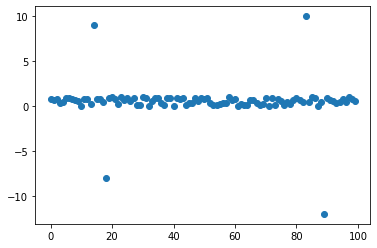

In [37]:
plt.scatter(x,y)

In [35]:
y[18] = -8
y[89] = -12

In [39]:
ESD_Test(y,0.05,10)

Grubbs critical value: 3.384082902288351
Grubbs Statistics value: 6.262230882581157
-12.0 is an outlier. G > G-critical: 6.2622 > 3.3841 

Grubbs critical value: 3.380650508067058
Grubbs Statistics value: 5.973651899141396
10.0 is an outlier. G > G-critical: 5.9737 > 3.3807 

Grubbs critical value: 3.377175980782947
Grubbs Statistics value: 6.836694687661131
-8.0 is an outlier. G > G-critical: 6.8367 > 3.3772 

Grubbs critical value: 3.3736583400522497
Grubbs Statistics value: 9.20608110313532
9.0 is an outlier. G > G-critical: 9.2061 > 3.3737 

Grubbs critical value: 3.370096570986626
Grubbs Statistics value: 1.8129590573658294
0.0019297565572488073 is not an outlier. G > G-critical: 1.8130 > 3.3701 

Grubbs critical value: 3.3664896240676505
Grubbs Statistics value: 1.8304052542175089
0.009459357761924969 is not an outlier. G > G-critical: 1.8304 > 3.3665 

Grubbs critical value: 3.362836413028039
Grubbs Statistics value: 1.8359499486276756
0.020975058974666894 is not an outlier. G >

https://statologos.jaol.net/grubbs-test-python/

In [18]:
from outliers import smirnov_grubbs as grubbs
import numpy as np
import pandas as pd

In [19]:
datos = np.array([-70, 5, 14, 15, 15, 14, 19, 17, 16,-60, 20, 22, 8, 21, 28, 11, 9, 29, 40])

In [20]:
datos

array([-70,   5,  14,  15,  15,  14,  19,  17,  16, -60,  20,  22,   8,
        21,  28,  11,   9,  29,  40])

In [21]:
#Prueba de grubbs detectando valores atípicos por ambos lados, y mostrando solo los validos
grubbs.test(datos,alpha = 0.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29])

In [22]:
#Prueba de grubss unilateral, detecta el valor mínimo y el máximod el conjunto de datos
datos1 = np.array ([5, 14,-100, 15, 15, 14, 19, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40])

In [23]:
#Retorna el indice del valor outlier de menor valor, en caso de no existir outliers no arrroja nada, tampoco el menor valor del conjunto numerico
grubbs.min_test_indices(datos1,alpha = 0.05)

[2]

In [24]:
#Retorna el índice del outlier de valor máximo, si no hay outliers no retorna el indice del mayor valor del conjunto, en dicho caso no retorna nada
grubbs.max_test_indices(datos1,alpha = 0.05)

[]

In [25]:
datos3 = np.array ([5, 14, 15, 15, 14,19, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40,90])

In [26]:
#Quita el outlier de valor máximo
grubbs.max_test(datos3,alpha = 0.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29])

In [27]:
#quita el outlier de valor mínimo
grubbs.min_test(datos3,alpha = 0.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29, 40,
       90])

In [28]:
#Como extraer el valor de LOS outliers encontrados maximos, si no hay no retorna nada
grubbs.max_test_outliers(datos3,alpha = 0.05)

[90, 40]

In [29]:
datos4 = np.array ([5, 14, 15, 15, 14,19,-1000,-1090, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40,90])

In [30]:
#Como extraer los valores de los outliers mínimos
grubbs.min_test_outliers(datos4,alpha = 0.05)

[-1090, -1000]